# Inhoud van één zin beschrijven

In [1]:
# Importeren van packages die gebruikt worden
import pandas as pd 

# libraries voor werken met tekstgegevens
import re       # regular expressions
import operator # gebruiken van C functie (https://docs.python.org/3.0/library/operator.html)

# packages voor visualisatie
import matplotlib.pyplot as plt
%matplotlib inline

Stap 1 is het verkrijgen van de te analyseren tekst(en). Deze les beginnen we met het beschrijven van één zin en bouwen we dit langzaam uit.

In [2]:
tekst = "Op een dag las ik een boek en heel mijn 7 levens veranderden. Heel mooi!"

Stap 2 is het pre-processen van de te analyseren tekst.
We willen dit straks kunnen hergebruiken voor langere teksten, dus maken functies aan waar mogelijk.

In [3]:
# Opbouwen van een woordvector waarbij elk woord wordt weergegeven in kleine letters

def tekstvoorbereid (InputTekst):
    input_klein = InputTekst.lower()
    woordvector = input_klein.split()
    return woordvector



Herschrijf de functie 'tekstvoorbereid' zo kort mogelijk.

In [4]:
# HERSCHRIJF DE FUNCTIE

def tekstvoorbereid (InputTekst):
    return InputTekst.lower().split()

De functie wordt aangeroepen en heeft als resultaat een woordvector. 

In [5]:
vector = tekstvoorbereid(tekst)

In [6]:
# Bekijk de opgebouwde woordvector
vector

['op',
 'een',
 'dag',
 'las',
 'ik',
 'een',
 'boek',
 'en',
 'heel',
 'mijn',
 '7',
 'levens',
 'veranderden.',
 'heel',
 'mooi!']

De woordvector bevat nu nog leestekens (interpunctie). Voor het analyseren van de woorden in een tekst is het nodig om de tekst eerst op te schonen door lees- en bijzondere tekens te verwijderen. Daarna wordt de woordvector opgebouwd. 

Het opschonen van een punt is gegeven. Zorg dat ook andere leestekens worden verwijderd m.b.v. de split-methode 
van regular expressions.

In [7]:
"""
Verwijderen van leestekens en andere bijzondere tekens uit de tekst. 
Vul de functie aan zoals gevraagd.
"""

def opschonen (InputTekst):
    GeenInterpunctie = re.split('[\.\!]', InputTekst)
    #split op alle "." (nog uitbreiden met "!")
    #????? GeenInterpunctie = [char for char in GeenInterpunctie]
    GeenInterpunctie = "".join(GeenInterpunctie)
    #plak alle strings achter elkaar
    return GeenInterpunctie

In [8]:
schoon = opschonen (tekst)
schoon

'Op een dag las ik een boek en heel mijn 7 levens veranderden Heel mooi'

In [9]:
vector = tekstvoorbereid (schoon)

In [10]:
vector

['op',
 'een',
 'dag',
 'las',
 'ik',
 'een',
 'boek',
 'en',
 'heel',
 'mijn',
 '7',
 'levens',
 'veranderden',
 'heel',
 'mooi']

Een woordwolk geeft de woorden die in een tekst voorkomen weer. De frequentie waarmee een woord voorkomt in een tekst bepaald hoe groot het woord wordt afgebeeld. Daarom willen we bepalen hoevaak ieder woord voorkomt in de tekst.

In [11]:
# Tellen van woorden in een vector
# Maakt gebruik van de operator module uit Python


def tellen(vector):
    freq={}
    for woord in vector:
        if woord in freq:
            freq[woord] +=1
        else:
            freq[woord] = 1
    sorted_freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
    #sorted_freq = gesorteerde freq op basis van de value (als key itemgetter(1) en dat gereversed. 
    #Mag ook met lambdafunctie, maar dan geen reverse
    #sorted_freq = sorted(freq.items(), key=lambda value: value[1])
    return sorted_freq

In [12]:
tellen(vector)

[('een', 2),
 ('heel', 2),
 ('op', 1),
 ('dag', 1),
 ('las', 1),
 ('ik', 1),
 ('boek', 1),
 ('en', 1),
 ('mijn', 1),
 ('7', 1),
 ('levens', 1),
 ('veranderden', 1),
 ('mooi', 1)]

Het meestvoorkomende woord in de ingevoerde tekst blijkt 'een' te zijn. Voor het analyseren van teksten verwijder je dit soort stopwoorden (lidwoorden, voegwoorden, etc.). Maak een dictionary aan met deze Nederlandse lidwoorden en voegwoorden. 

In [13]:
stopwoorden = {'de', 'het', 'een','en', 'op'}
#zelf bedenken

In [14]:
def StopwoordenVerwijderen(InputTekst):
    schoon=[]
    for woord in InputTekst.split():
        if woord.lower() not in stopwoorden:
            schoon.append(woord)
    return schoon

In [15]:
# kortste alternatief
def StopwoordenVerwijderen (InputTekst):
    return [woord for woord in InputTekst.split() if woord not in stopwoorden]


In [16]:
StopwoordenVerwijderen(schoon)

['Op',
 'dag',
 'las',
 'ik',
 'boek',
 'heel',
 'mijn',
 '7',
 'levens',
 'veranderden',
 'Heel',
 'mooi']

Combineer de functies voor het opschonen, verwijderen van stopwoorden en tellen. Nu heb je een 'bag of words' gedefinieerd.

In [17]:
BagofWords = tellen(StopwoordenVerwijderen(opschonen(tekst.lower())))

In [18]:
BagofWords

[('heel', 2),
 ('dag', 1),
 ('las', 1),
 ('ik', 1),
 ('boek', 1),
 ('mijn', 1),
 ('7', 1),
 ('levens', 1),
 ('veranderden', 1),
 ('mooi', 1)]

Maak een grafiek die weergeeft hoevaak een woord wordt gebruikt in een tekst. Op deze manier kun je in één oogopslag belangrijke woorden vaststellen.

In [19]:
bow = pd.DataFrame(BagofWords, columns=['woord','aantal'])
#eerst omzetten dataframe

In [20]:
bow

,woord,aantal
0,heel,2
1,dag,1
2,las,1
3,ik,1
4,boek,1
5,mijn,1
6,7,1
7,levens,1
8,veranderden,1
9,mooi,1


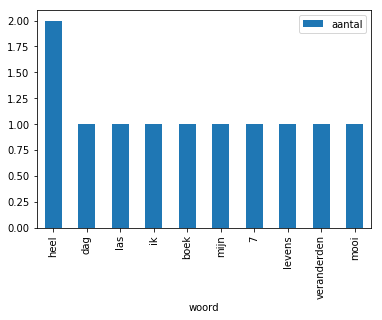

In [21]:
bow.plot(x='woord', kind='bar')

Van de bovenstaande stappen maken we ook weer een functie zodat het hergebruik vereenvoudigd wordt.

In [22]:
# Opbouwen bag of words uit een tekst
# Weergeven van bag of wordst in een bar chart


def bowChart(InputTekst):
    BagofWords = pd.DataFrame(tellen(StopwoordenVerwijderen(opschonen(InputTekst.lower()))), columns=['woord','aantal'])
    Plot = BagofWords.plot(x='woord', kind='bar')
    return Plot

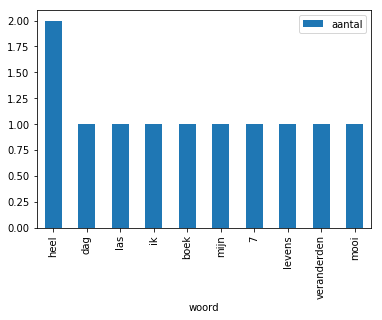

In [23]:
bowChart(tekst)

# Inhoud van meerdere zinnen beschrijven
Ga naar je favoriete nieuwssite en kopieer in de cel hieronder de eerste zinnen uit een artikel in 'nieuws'.

In [ ]:
nieuws = "___________"

In [ ]:
bowChart(______)